# ***Dataset Overview***

The dataset contains 891 rows and 12 columns. Below is a summary of the key observations from the initial inspection:

**Columns**:

PassengerId: Unique identifier for each passenger.

Survived: Target variable (0 = did not survive, 1 = survived).

Pclass: Passenger class (1st, 2nd, or 3rd).

Name: Passenger name.

Sex: Gender.

Age: Age of the passenger (contains missing values).

SibSp: Number of siblings/spouses aboard.

Parch: Number of parents/children aboard.

Ticket: Ticket number.

Fare: Ticket fare.

Cabin: Cabin number (mostly missing).

Embarked: Port of embarkation (C, Q, S; contains missing values).

**Missing Values:**

Age: 714/891 non-null (177 missing).

Cabin: 204/891 non-null (687 missing).

Embarked: 889/891 non-null (2 missing).

**Data Types:**

Numeric: PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare.

Categorical: Name, Sex, Ticket, Cabin, Embarked.

In [18]:
import pandas as pd

# Load the dataset
#file_path = '/mnt/data/train.csv'
data = pd.read_csv('/content/train.csv')

# Display basic information and first few rows of the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None,
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450  

# ***Data Cleaning Summary***

>

**Dropped Columns:**

Cabin was removed due to a high proportion of missing values (77% missing).

**Handled Missing Values:**

Age: Missing values were replaced with the median age (to avoid outlier influence).

Embarked: Missing values were filled with the mode (S, the most common port).

**Current Status:**

All missing values have been addressed, and the dataset is now ready for exploratory data analysis (EDA).

In [19]:
# Check missing values in the dataset
missing_values = data.isnull().sum()

# Drop 'Cabin' column due to a high percentage of missing values
data_cleaned = data.drop(columns=['Cabin'])

# Fill missing 'Age' values with the median age
data_cleaned['Age'].fillna(data_cleaned['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the most common port
data_cleaned['Embarked'].fillna(data_cleaned['Embarked'].mode()[0], inplace=True)

# Verify missing values after cleaning
missing_values_after = data_cleaned.isnull().sum()

missing_values, missing_values_after


<ipython-input-19-7bf9d024e8d4>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['Age'].fillna(data_cleaned['Age'].median(), inplace=True)
<ipython-input-19-7bf9d024e8d4>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Embarked       0
 dtype: int64)

# ***Univariate Analysis Observations***

**Numerical Variables:**

**1) Age:**

Distribution is slightly right-skewed, with most passengers between 20-40 years old.
Some younger and older passengers are present as well.

**2)Fare:**

Highly right-skewed, with most fares concentrated under 50.
Few passengers paid extremely high fares (outliers).

**3)SibSp:**

Majority of passengers traveled alone or with 1 sibling/spouse.
Larger groups (3 or more) are less common.

**4)Parch:**

Most passengers did not travel with parents/children.
Traveling with 1 or 2 family members is more frequent than larger groups.


***Categorical Variables:***


**1)Survived:**

Around 38% survived, while 62% did not.
Implies an overall survival rate of ~38%.

**2)Pclass:**

Majority of passengers were in 3rd class, followed by 1st and 2nd classes.
Indicates a socioeconomic spread.

**3)Sex:**

More males than females were aboard.
Could be relevant when examining survival rates.

**4)Embarked:**

Most passengers embarked from port S (Southampton), followed by C (Cherbourg) and Q (Queenstown).

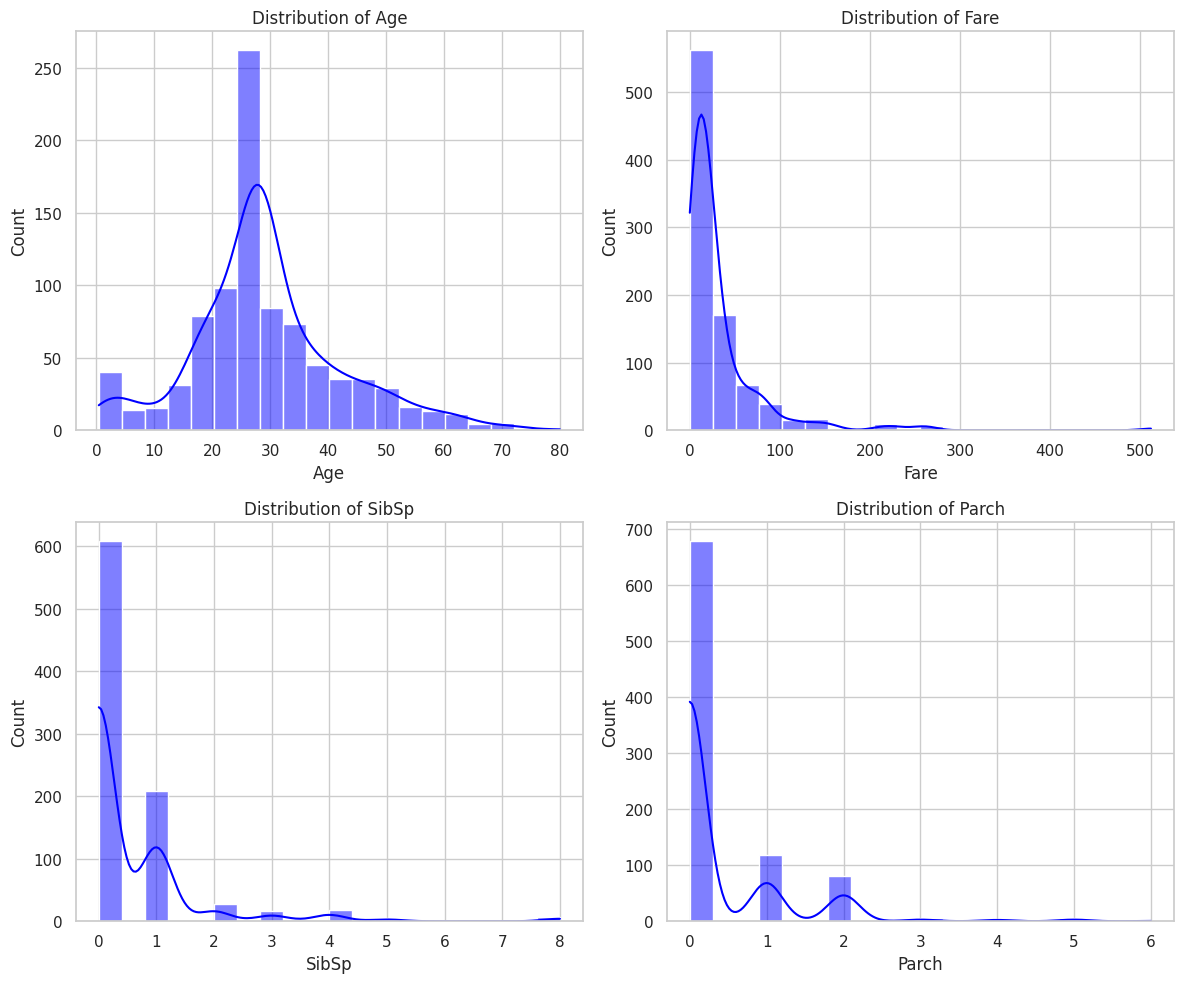

<ipython-input-7-a91d529b3cc1>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, ax=axes[i], palette="Set2")
<ipython-input-7-a91d529b3cc1>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, ax=axes[i], palette="Set2")
<ipython-input-7-a91d529b3cc1>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, ax=axes[i], palette="Set2")
<ipython-input-7-a91d529b3cc1>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14

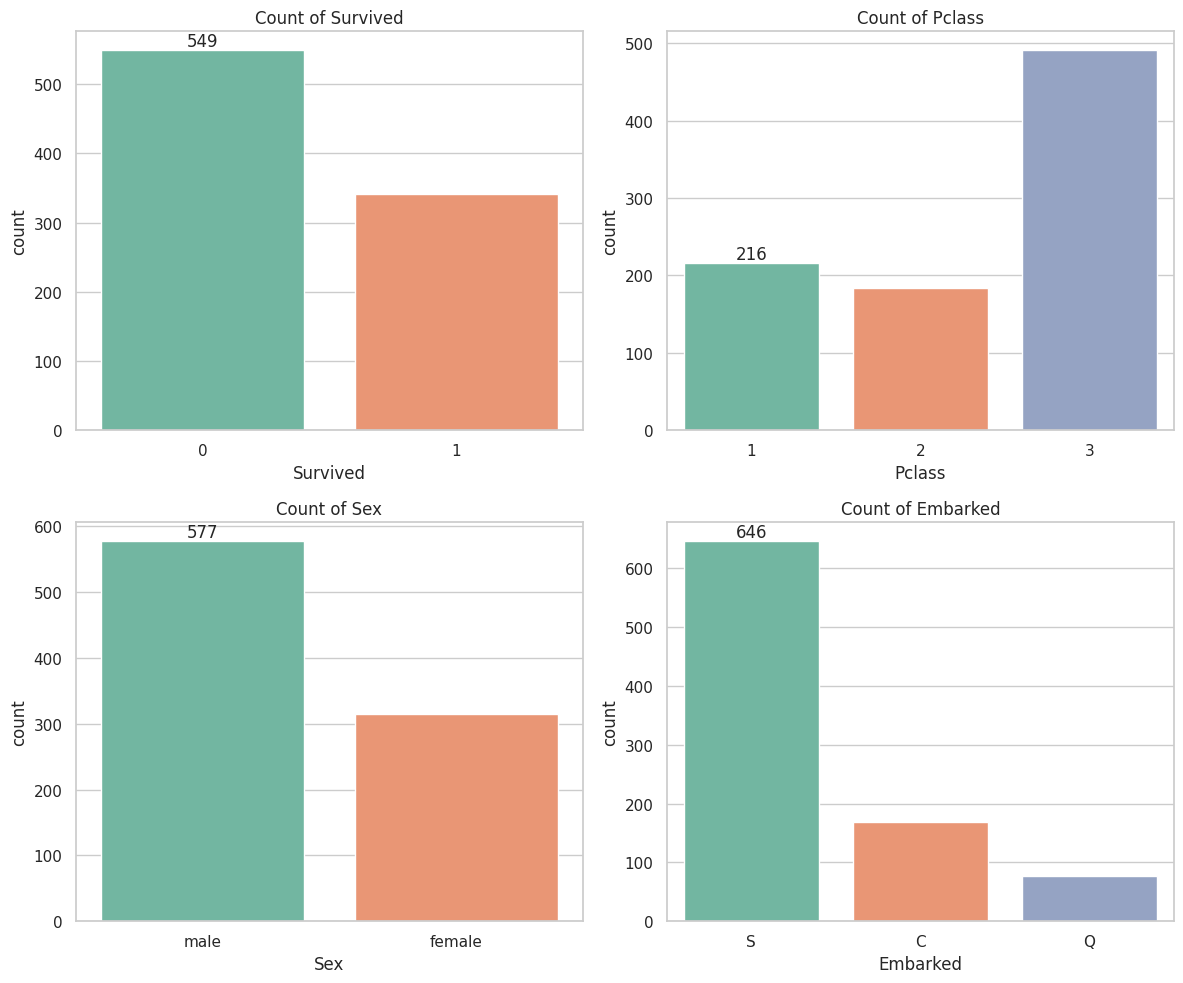

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Univariate analysis: Plot distributions of numerical variables
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data_cleaned[col], kde=True, ax=axes[i], color='blue', bins=20)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Count plots for categorical variables
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=data_cleaned, x=col, ax=axes[i], palette="Set2")
    axes[i].set_title(f'Count of {col}')
    axes[i].bar_label(axes[i].containers[0])

plt.tight_layout()
plt.show()


# ***Analyzing Survival Rates Based on Variables***
1. Survival by Gender
Group the data by the Sex column and calculate the mean survival rate.
Visualize it with a bar chart to compare survival rates between males and females.

2. Survival by Class
Group the data by the Pclass column and calculate the mean survival rate.
Create a bar chart to understand how survival rates vary across 1st, 2nd, and 3rd classes.

3. Survival by Embarkation Port
Group the data by the Embarked column and calculate the mean survival rate.
Visualize it using a bar chart to see which port had the highest survival rate.

<ipython-input-8-9b76fec8749a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values, ax=axes[0], palette="viridis")
<ipython-input-8-9b76fec8749a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_class.index, y=survival_by_class.values, ax=axes[1], palette="viridis")
<ipython-input-8-9b76fec8749a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_embarked.index, y=survival_by_embarked.values, ax=axes[2], palette="viridis")


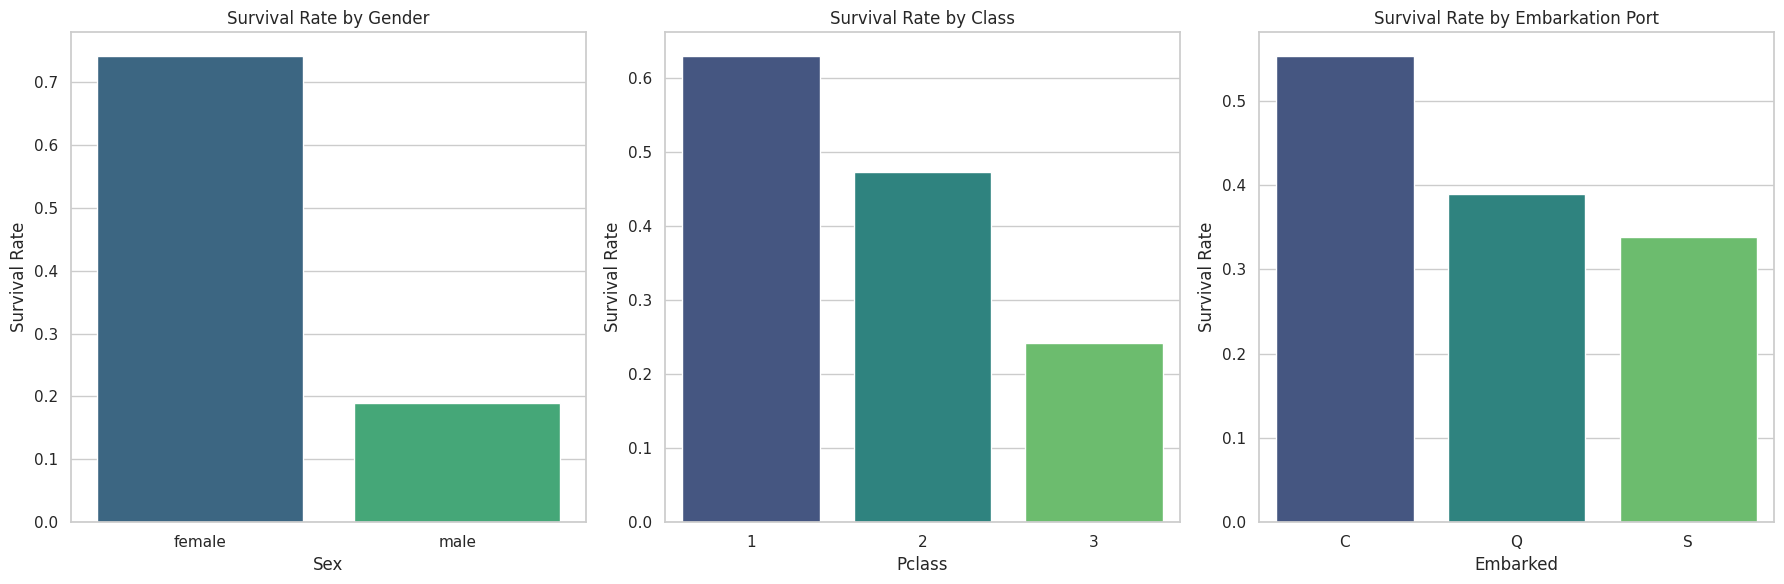

In [ ]:
# Analyze survival rates based on different variables

# Survival by gender
survival_by_gender = data_cleaned.groupby('Sex')['Survived'].mean()

# Survival by class
survival_by_class = data_cleaned.groupby('Pclass')['Survived'].mean()

# Survival by embarkation port
survival_by_embarked = data_cleaned.groupby('Embarked')['Survived'].mean()

# Visualize survival rates
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values, ax=axes[0], palette="viridis")
axes[0].set_title("Survival Rate by Gender")
axes[0].set_ylabel("Survival Rate")

sns.barplot(x=survival_by_class.index, y=survival_by_class.values, ax=axes[1], palette="viridis")
axes[1].set_title("Survival Rate by Class")
axes[1].set_ylabel("Survival Rate")

sns.barplot(x=survival_by_embarked.index, y=survival_by_embarked.values, ax=axes[2], palette="viridis")
axes[2].set_title("Survival Rate by Embarkation Port")
axes[2].set_ylabel("Survival Rate")

plt.tight_layout()
plt.show()


# ***Further Analysis Steps :***

**1) Analyze the relationship between age and survival:**
Use a boxplot to compare age distributions for survivors and non-survivors.

**2) Analyze the impact of family size on survival:**
Combine SibSp and Parch into a new column FamilySize.
Examine survival rates based on family size.

**3) Correlation analysis for numerical variables:**
Use a heatmap to visualize correlations between numerical variables.

<ipython-input-10-df693ab44f90>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x='Survived', y='Age', palette="Set2")


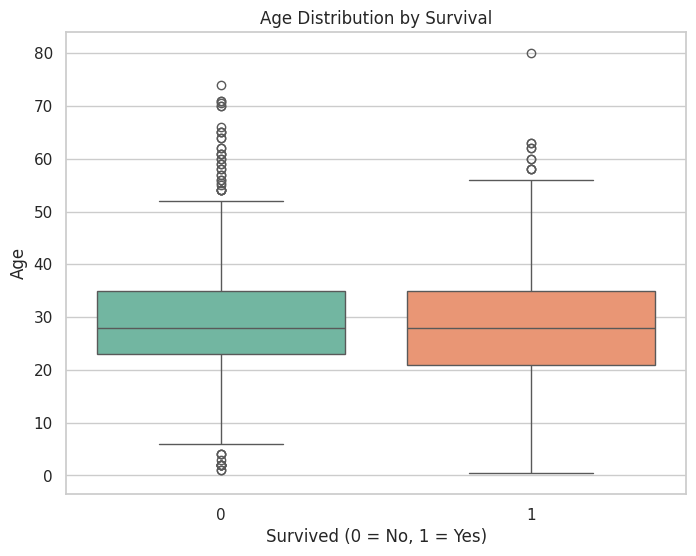

In [ ]:
# Boxplot of age vs survival
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_cleaned, x='Survived', y='Age', palette="Set2")
plt.title("Age Distribution by Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()


<ipython-input-11-7a7681845e25>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=family_size_survival.index, y=family_size_survival.values, palette="coolwarm")


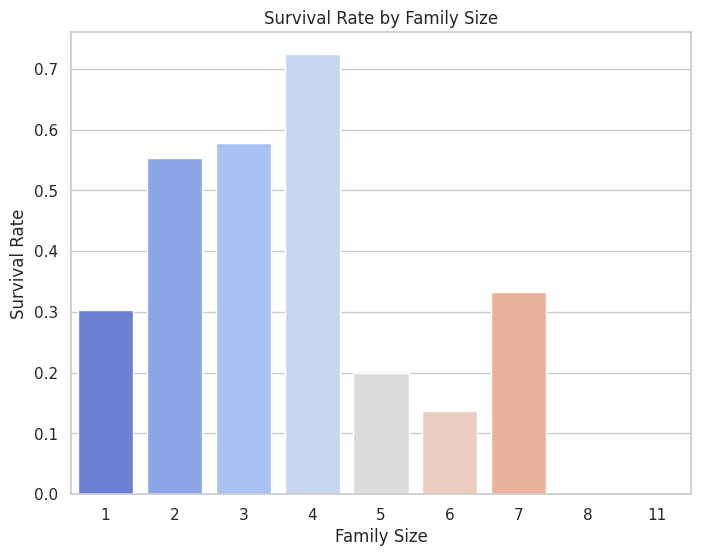

In [ ]:
# Create FamilySize column
data_cleaned['FamilySize'] = data_cleaned['SibSp'] + data_cleaned['Parch'] + 1

# Survival rate by family size
family_size_survival = data_cleaned.groupby('FamilySize')['Survived'].mean()

# Plot survival rate by family size
plt.figure(figsize=(8, 6))
sns.barplot(x=family_size_survival.index, y=family_size_survival.values, palette="coolwarm")
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()



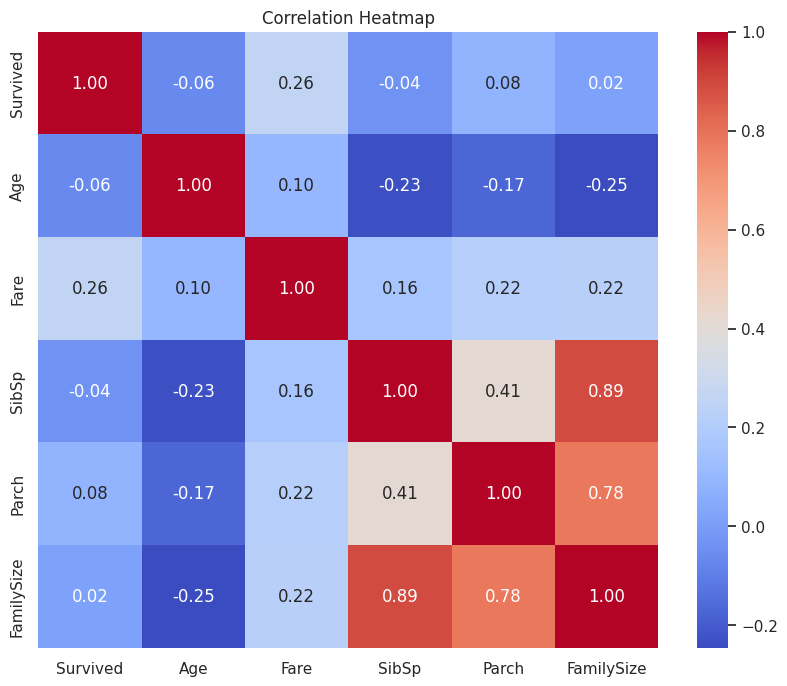

In [ ]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
corr_matrix = data_cleaned[['Survived', 'Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# ***Further Steps:***

**Analyze survival rate across multiple categories:**
Combine variables (e.g., Pclass and Sex) to see how survival rates vary across groups.

**Create age groups and analyze survival:**
Bin ages into categories (e.g., children, adults, seniors) and study their survival rates.

**Visualize survival trends with multiple factors:**
Use a facet grid to explore survival trends across multiple dimensions.

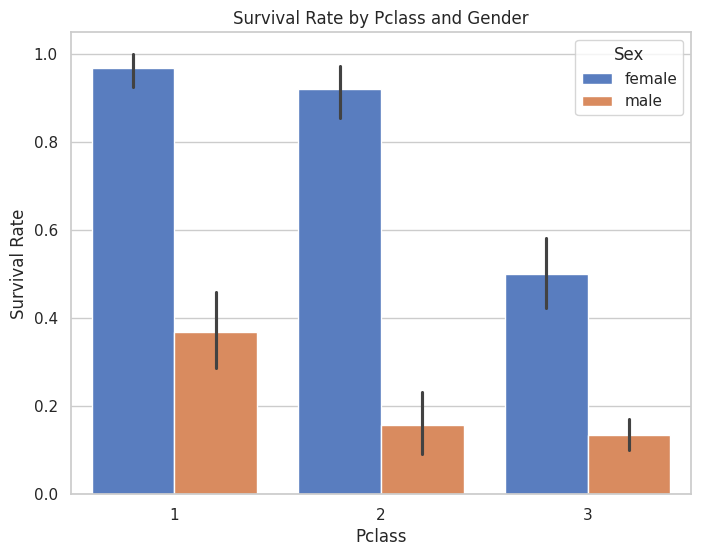

In [ ]:
# Survival rates by Pclass and Sex
plt.figure(figsize=(8, 6))
sns.barplot(data=data_cleaned, x='Pclass', y='Survived', hue='Sex', palette='muted')
plt.title("Survival Rate by Pclass and Gender")
plt.xlabel("Pclass")
plt.ylabel("Survival Rate")
plt.legend(title="Sex")
plt.show()


<ipython-input-14-4c92bbee1849>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = data_cleaned.groupby('AgeGroup')['Survived'].mean()
<ipython-input-14-4c92bbee1849>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_survival.index, y=age_group_survival.values, palette='coolwarm')


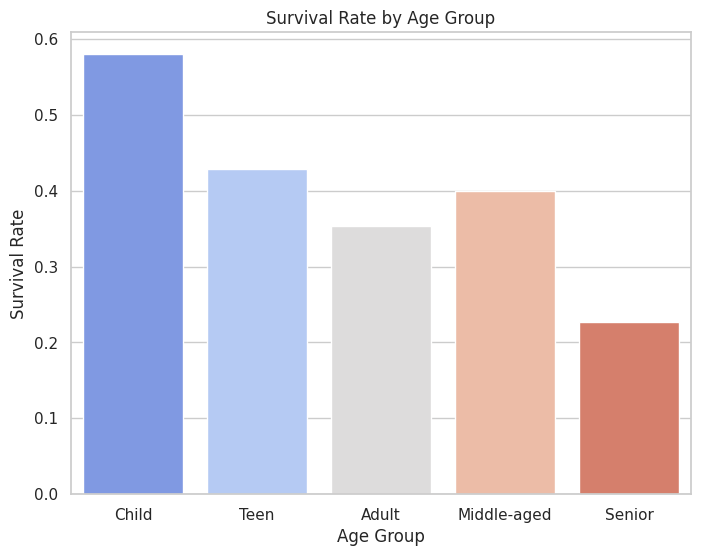

In [ ]:
# Create age groups
bins = [0, 12, 18, 35, 60, 80]
labels = ['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior']
data_cleaned['AgeGroup'] = pd.cut(data_cleaned['Age'], bins=bins, labels=labels)

# Survival rate by age group
age_group_survival = data_cleaned.groupby('AgeGroup')['Survived'].mean()

# Plot survival rate by age group
plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_survival.index, y=age_group_survival.values, palette='coolwarm')
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

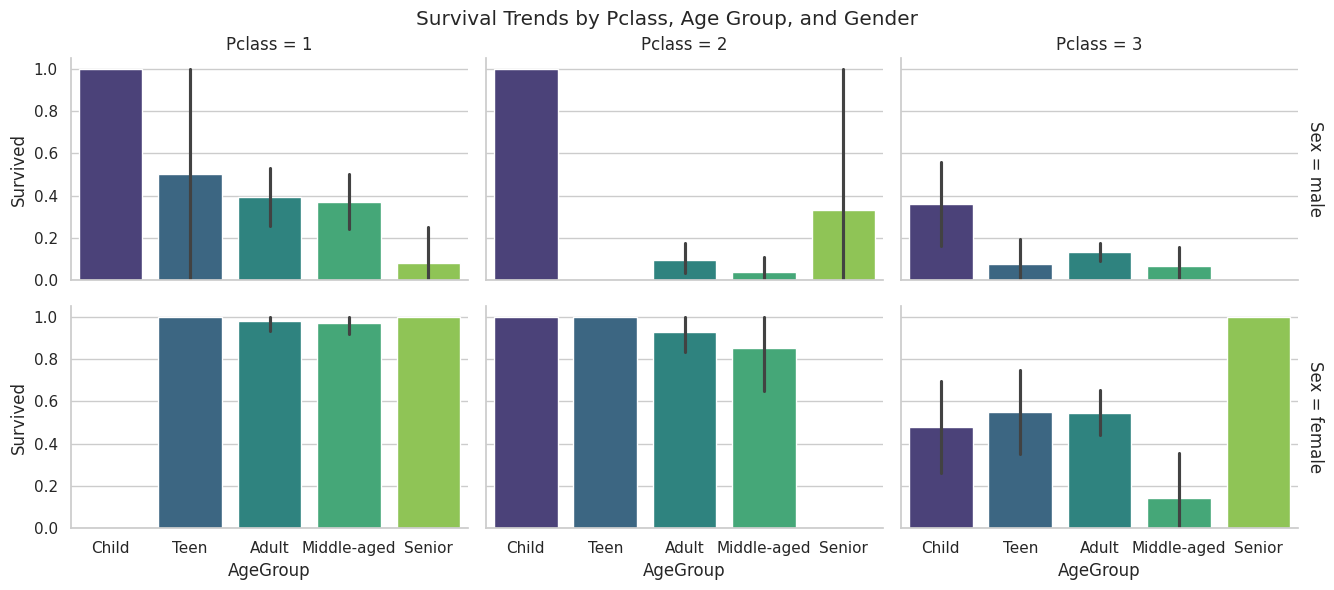

In [ ]:
# Survival trends with multiple factors (Pclass, AgeGroup, and Sex)
g = sns.FacetGrid(data_cleaned, col="Pclass", row="Sex", margin_titles=True, height=3, aspect=1.5)
g.map_dataframe(sns.barplot, x="AgeGroup", y="Survived", order=labels, palette="viridis")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Survival Trends by Pclass, Age Group, and Gender")
plt.show()
